In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
ratings = pd.read_csv("/content/drive/MyDrive/Giảng dạy/Hệ khuyến nghị/movielens/ratings.csv", sep = ',')
movies = pd.read_csv("/content/drive/MyDrive/Giảng dạy/Hệ khuyến nghị/movielens/movies.csv", sep = ',')

In [ ]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(ratings, test_size=0.001, random_state=42)

In [ ]:
len(X_test)

101

In [ ]:
len(X_train)

100735

In [ ]:
X_test

,userId,movieId,rating,timestamp
67037,432,77866,4.5,1335139641
42175,288,474,3.0,978465565
93850,599,4351,3.0,1498524542
6187,42,2987,4.0,996262677
12229,75,1610,4.0,1158989841
...,...,...,...,...
66631,428,6365,3.0,1111489458
22373,152,858,5.0,1450572429
50725,328,1198,5.0,1494210760
66284,427,435,3.0,1053068798


In [ ]:
#lấy ra danh sách khuyến nghị từ cho user (phần này sử dụng lại code khuyến nghị lọc cộng tác dựa trên người dùng trong lab2)
def get_recommendation1_(userid):
  #code bla bla
    return recommendations


In [ ]:
ls = get_recommendation1_(1)
ls

In [ ]:
len(ls)

2012

In [ ]:
# hàm dữ đoán trên tập test 

def get_recommendation_4test(test):

  X_test_pred = []
  X_test_userid = X_test['userId'].tolist()   #lấy ra danh sách các userID trong tập test 
  X_test_movieID = X_test['movieId'].tolist()

  print("------Dự đoán cho tập test với {} điểm dữ liệu -----------".format(len(X_test_userid)))
  
  for i in range(len(X_test_userid)):        #lấy ra từng user
    list_R = get_recommendation1_(X_test_userid[i])    #lất ra danh sách khuyến nghị cho mỗi USER 
    check = 0
    for j in list_R:
      if(X_test_movieID[i] == j[1]):     #j[1] là lấy vị trí số 2 của 1 tuple 
        X_test_pred.append(j[2])
        check = 1
    if(check == 0):
      X_test_pred.append(0)
    print('----- Đang dự đoán cho dòng thứ {}'.format(i), 'là {}'.format(X_test_pred[i])) 
  return X_test_pred

In [ ]:
import time
start = time.time()

X_test_pred_rating = get_recommendation_4test(X_test)


end = time.time()
print('Tổng thời gian dự đoán: ', end - start)

------Dự đoán cho tập test với 101 điểm dữ liệu -----------
----- Đang dự đoán cho dòng thứ 0 là 2.0
----- Đang dự đoán cho dòng thứ 1 là 4.0
----- Đang dự đoán cho dòng thứ 2 là 1.0
----- Đang dự đoán cho dòng thứ 3 là 4.0
----- Đang dự đoán cho dòng thứ 4 là 3.6899917909645694
----- Đang dự đoán cho dòng thứ 5 là 3.0
----- Đang dự đoán cho dòng thứ 6 là 3.0
----- Đang dự đoán cho dòng thứ 7 là 5.0
----- Đang dự đoán cho dòng thứ 8 là 1.0
----- Đang dự đoán cho dòng thứ 9 là 4.0
----- Đang dự đoán cho dòng thứ 10 là 5.0
----- Đang dự đoán cho dòng thứ 11 là 0
----- Đang dự đoán cho dòng thứ 12 là 2.9999999999999996
----- Đang dự đoán cho dòng thứ 13 là 0
----- Đang dự đoán cho dòng thứ 14 là 5.0
----- Đang dự đoán cho dòng thứ 15 là 4.0
----- Đang dự đoán cho dòng thứ 16 là 0
----- Đang dự đoán cho dòng thứ 17 là 0
----- Đang dự đoán cho dòng thứ 18 là 3.5080291998037003
----- Đang dự đoán cho dòng thứ 19 là 0
----- Đang dự đoán cho dòng thứ 20 là 3.0
----- Đang dự đoán cho dòng thứ 2

In [ ]:
len(X_test_pred_rating)

101

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X_test['rating'].tolist(), X_test_pred_rating)

6.050755150300397

In [ ]:
X_test_pred_rating

[2.0,
 4.0,
 1.0,
 4.0,
 3.6899917909645694,
 3.0,
 3.0,
 5.0,
 1.0,
 4.0,
 5.0,
 0,
 2.9999999999999996,
 0,
 5.0,
 4.0,
 0,
 0,
 3.5080291998037003,
 0,
 3.0,
 0,
 3.0,
 0,
 3.23155295782244,
 0,
 0,
 3.0,
 4.0,
 0,
 0,
 0,
 4.281808664343998,
 3.0160583996073997,
 2.5,
 0,
 0,
 0,
 2.5,
 0,
 3.0,
 0,
 4.0,
 0,
 4.0,
 0,
 0,
 0,
 4.0,
 3.612709939589584,
 3.5,
 2.5,
 4.52786404500042,
 2.0,
 0,
 0,
 0,
 4.0,
 3.0,
 2.5,
 4.310008209035431,
 0,
 0,
 3.0,
 0,
 2.5,
 0,
 3.0,
 3.0,
 0,
 0,
 3.5,
 0,
 3.0,
 0,
 0,
 3.5,
 0,
 0,
 4.0,
 3.0,
 0,
 0,
 3.5,
 0,
 0,
 0,
 4.0,
 0,
 0,
 2.6899917909645694,
 0,
 3.0,
 0,
 4.44529041942296,
 0,
 2.4300246271062917,
 4.200360864390229,
 4.069975372893708,
 3.0,
 2.379983581929139]

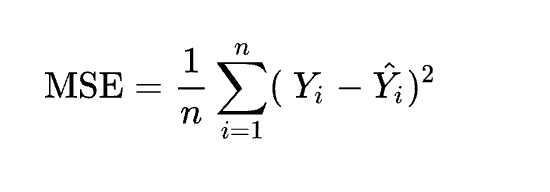

In [ ]:
import math
mse = mean_squared_error(X_test_true_rating_select , X_test_pred_rating_select)
print('----- MSE: ',mse)

rmse = math.sqrt(mse)
print('----- RMSE: ',rmse)

56
----- MSE:  1.158504824648929
----- RMSE:  1.07633861988174


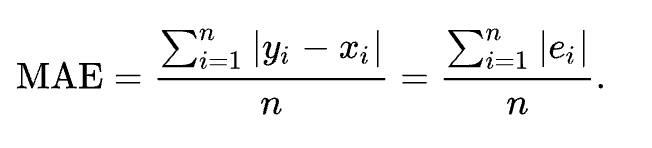

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(X_test_true_rating_select , X_test_pred_rating_select)
print('----- MAE: ',mae)

----- MAE:  0.82279654829048


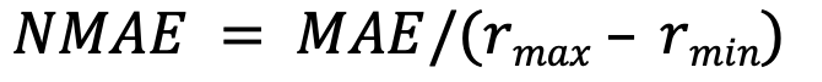

In [ ]:
#có thể dùng hàm min(), max()
X_test_true_rating_select.sort(reverse=True)
max = X_test_true_rating_select[0]
min = X_test_true_rating_select[len(X_test_true_rating_select) -1]

nmae = mae/(max-min)
print('----- NMAE: ',nmae)

----- NMAE:  0.18284367739788443
